Data Scientist Screening Exercise

In [1]:
#Import data
import pandas as pd
data = pd.read_csv("C:/Users/alexliuyi/Documents/LAHealth/model_outcome.csv")

In [3]:
#Check data
data.head()

,index,class,predicted_prob
0,1,0,0.592837
1,2,1,0.624829
2,3,0,0.073848
3,4,1,0.544891
4,5,0,0.015118


In [10]:
#Check number of features and observations
data.shape

(1000, 3)

In [9]:
#Check Missing: No missing value
data.describe()

,index,class,predicted_prob
count,1000.000000,1000.000000,1000.000000
mean,500.500000,0.492000,0.510150
std,288.819436,0.500186,0.263700
min,1.000000,0.000000,0.000967
25%,250.750000,0.000000,0.313266
50%,500.500000,0.000000,0.515382
75%,750.250000,1.000000,0.702314
max,1000.000000,1.000000,0.994258


Task 1:
Manually calculate the sensitivity and specificity of the model, using a predicted_prob threshold of greater than or equal to .5.

In [11]:
# Create a function to calculate the FPR and TPR at different cut point.
import numpy as np

def FPR_RPR_Calculator(threshold):
    # Calculate predicted class with prob
    data["predicted_class"] = np.where(data.predicted_prob >= threshold, 1,0)
    
    # Create confusion matrix 
    data["TP"] = np.where((data["class"]==1) & (data["predicted_class"]==1), 1,0)
    data["FN"] = np.where((data["class"]==1) & (data["predicted_class"]!=1), 1,0)
    data["FP"] = np.where((data["class"]!=1) & (data["predicted_class"]==1), 1,0)
    data["TN"] = np.where((data["class"]!=1) & (data["predicted_class"]!=1), 1,0)
    
    TP = np.sum(data.TP)
    FN = np.sum(data.FN)
    FP = np.sum(data.FP)
    TN = np.sum(data.TN)
    
    # Calculate sensitivity
    sensitivity = TP/(TP+FN)
    # Calculate specificity
    specificity = TN/(TN+FP)
    # Return FPR and TPR
    return round(1-specificity,4),round(sensitivity,4)

In [12]:
# Calculate sensitivity and specificity when threshold = 0.5
FPR, TPR = FPR_RPR_Calculator(0.5)

print("Sensitivity of the model is %.4f"% TPR)
print("Specificity of the model is %.4f"% (1-FPR))

Sensitivity of the model is 0.8171
Specificity of the model is 0.7579


Task 2:
Manually calculate the Area Under the Receiver Operating Characteristic Curve.

In [13]:
# Create 1000 cut point between 0 and 1
threshold = np.linspace(1,0,1000)

# Create empty list for FPR and TPR
FPR = list()
TPR = list()

# For each cup point, calculate FPR and TPR and append them to above empty list
for i in threshold:
    temp_FPR, temp_TPR = FPR_RPR_Calculator(i)
    FPR.append(temp_FPR)
    TPR.append(temp_TPR)
    
# Transfer lists to numpp array
FPR = np.array(FPR)
TPR = np.array(TPR)   

# Caluculate AUC 
AUC = 1/2*np.sum((FPR[1:]-FPR[0:-1])*(TPR[0:-1]+TPR[1:]))

# Print result
print("The AUC of the model is: %.4f"%AUC)

The AUC of the model is: 0.8886


Task 3:
Visualize the Receiver Operating Characterstic Curve.

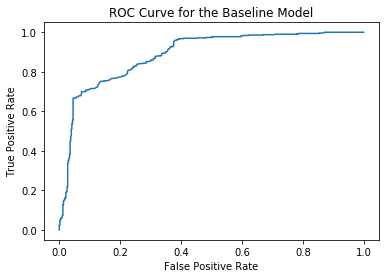

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(FPR, TPR)
ax.set(title = 'ROC Curve for the Baseline Model',
       xlabel = 'False Positive Rate',
       ylabel = 'True Positive Rate')
plt.show()